In [20]:
# first we need to import some modules
# utility to read json format
import json as js
# urllib2 is a module for fetching URL (Uniform Resource Locator) data
import urllib2 as ulib
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
# form a request
request_string='http://api.fda.gov/drug/event.json?search=patient.drug.medicinalproduct:aspirin&count=patient.reaction.reactionmeddrapt.exact'

response=ulib.urlopen(request_string)

print response

# load as json
fda_data=js.load(response)

fda_data

<addinfourl at 287711304L whose fp = <socket._fileobject object at 0x00000000115212A0>>


{u'meta': {u'disclaimer': u'openFDA is a beta research project and not for clinical use. While we make every effort to ensure that data is accurate, you should assume all results are unvalidated.',
  u'last_updated': u'2016-03-18',
  u'license': u'http://open.fda.gov/license'},
 u'results': [{u'count': 12435, u'term': u'DYSPNOEA'},
  {u'count': 12139, u'term': u'NAUSEA'},
  {u'count': 10797, u'term': u'DIZZINESS'},
  {u'count': 10755, u'term': u'FATIGUE'},
  {u'count': 10676, u'term': u'MYOCARDIAL INFARCTION'},
  {u'count': 10498, u'term': u'FLUSHING'},
  {u'count': 9368, u'term': u'DIARRHOEA'},
  {u'count': 9110, u'term': u'DRUG INEFFECTIVE'},
  {u'count': 8492, u'term': u'ASTHENIA'},
  {u'count': 8238, u'term': u'HEADACHE'},
  {u'count': 7401, u'term': u'PAIN'},
  {u'count': 7368, u'term': u'FALL'},
  {u'count': 7245, u'term': u'VOMITING'},
  {u'count': 7086, u'term': u'PRURITUS'},
  {u'count': 7069, u'term': u'CHEST PAIN'},
  {u'count': 6649, u'term': u'CEREBROVASCULAR ACCIDENT'},
 

In [27]:
type(fda_data)

dict

## How to look at keys in a dictionary

In [4]:
for key, value in fda_data.iteritems() :
    print key

meta
results


In [29]:
results=fda_data['results']

In [30]:
type(results)

list

## Convert to Pandas

In [33]:
test=pd.DataFrame(results)

In [34]:
test.head()

,count,term
0,12435,DYSPNOEA
1,12139,NAUSEA
2,10797,DIZZINESS
3,10755,FATIGUE
4,10676,MYOCARDIAL INFARCTION


## define a function to retrieve drug info using Open FDA

In [37]:
# form a request
def getDrugData(drugname):
    request_string='http://api.fda.gov/drug/event.json?search=patient.drug.medicinalproduct:'+drugname+'&count=patient.reaction.reactionmeddrapt.exact'
    response=ulib.urlopen(request_string)
    
    # load as json
    fda_data=js.load(response)['results']
    
    # make it a dataframe
    fda_data=pd.DataFrame(fda_data)

    # make drug term the index and return
    return fda_data.set_index('term')

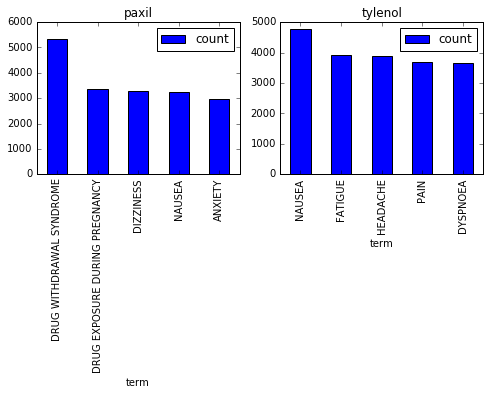

In [46]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

drugname1='paxil'
drugname2='tylenol'

data1=getDrugData(drugname1)
data2=getDrugData(drugname2)

fig=plt.figure(figsize=(8, 6))

ax1=plt.subplot(221)
ax2=plt.subplot(222)

data1.iloc[0:5].plot.bar(ax=ax1)
data2.iloc[0:5].plot.bar(ax=ax2)

ax1.set_title(drugname1)
ax2.set_title(drugname2)

In [26]:
pd.__version__

'0.16.2'